In [15]:
import ROOT

In [16]:
from PileUp_SF_config import *

In [17]:
from ROOT import TFile, TH2F, TCanvas, TH1D, TH1F

In [18]:
f  = TFile(PileUp_SF_path_Data)

In [19]:
f.ls()

TFile**		./DATA/MyDataPileupHistogram_23sepjsonfile_true692_75bin.root	
 TFile*		./DATA/MyDataPileupHistogram_23sepjsonfile_true692_75bin.root	
  KEY: TH1D	pileup;1	pileup


In [20]:
h = TH1D()

In [21]:
c = TCanvas("SF","SF",600,400)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: SF


In [22]:
f.GetObject("pileup",h)

Info in <TCanvas::Print>: pdf file PileUp_SF.pdf has been created


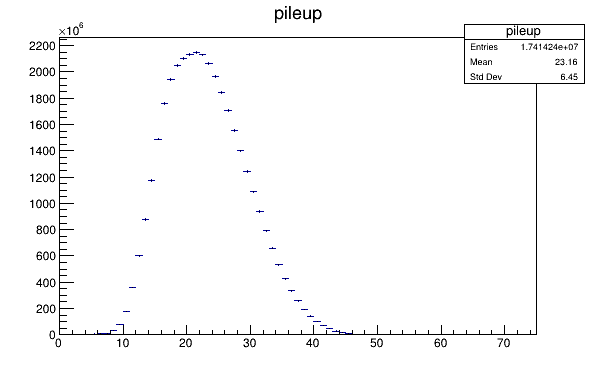

In [23]:
h.Draw("colz")
c.Draw()
c.SaveAs("PileUp_SF.pdf")

In [24]:
#normalize histogram
nx = h.GetNbinsX()
print("# bins X = "+str(nx))
h.Scale(1.0/h.Integral())

# bins X = 75


In [30]:
# Read text file (MC values)
txt = open(PileUp_SF_path_MC)
mc = str()
for line in txt:
    mc += line
mc = mc.strip().split("=")[1].split("{")[1].split("}")[0].split(" ,")
mc = map(lambda x: float(x),mc)

In [26]:
# Scale histogram (to match MC with Data)
for i in xrange(0,nx):
    bin_index = i + 1
    h.SetBinContent(bin_index,(1.0/mc[i])*h.GetBinContent(bin_index) )

Info in <TCanvas::Print>: pdf file PileUp_SF.pdf has been created


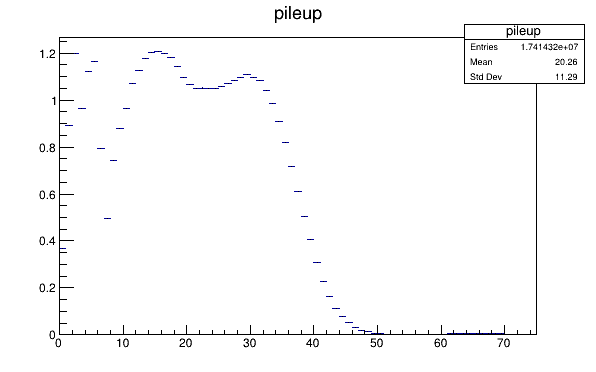

In [27]:
h.Draw("colz")
c.Draw()
c.SaveAs("PileUp_SF.pdf")

In [ ]:
dotH_name = "PileUp_SF.h"
dotC_name = "PileUp_SF.C"
func_type = "Double_t"
func_name = "pileUp_SF"
x_type = "Int_t"
x_name = "nTrueInt"

In [ ]:
dotH = str()

dotH += "#ifndef "+dotH_name.upper().split(".")[0]+str("_H_INCLUDED\n")
dotH += "#define "+dotH_name.upper().split(".")[0]+str("_H_INCLUDED\n")
dotH += "\n"
dotH += func_type+" "+func_name+"("+x_type+" "+x_name+");\n"
dotH += "\n"
dotH += "#endif"
print(dotH)

In [ ]:
dotC = str()

dotC += "#include \""+dotH_name+"\"\n\n"
dotC += func_type+" "+func_name+"("+x_type+" "+x_name+"){\n"
for i in xrange(0,nx):
    bin_index = i+1
    dotC += "\tif( "+x_name+" == "+str(i)+"){\n"
    dotC += "\t\treturn\t"+str(h.GetBinContent(bin_index))+";\n"
    dotC += "\t}\n"
dotC += "\n\telse cout<<\"ERROR: UNEXPECTED behavior in one of pileUp_SF... function\"<<endl;\n"
dotC += "\tif( "+x_name+" > 74 || "+x_name+" < 0){\n"
dotC += "\t\tcout<<\"Error: Wrong number of nTrueInt(pileUp)\"<<endl;\n"
dotC += "\t\texit(1);\n"
dotC += "\t}\n"
dotC += "\n\treturn\t1000000;\n"
dotC+="}"

In [ ]:
def write_code(name,s):
    code_file = file(name,"w")
    code_file.write(s)
    code_file.close()
    
write_code(dotH_name,dotH)
write_code(dotC_name,dotC)